In [28]:
x = [
    [1.0, 4.0],
    [2.0, 3.5],
    [3.0, 5.0],
    [4.0, 4.5],
    [5.0, 5.0],
    [6.0, 6.0],
    [7.0, 5.5],
    [8.0, 6.5],
    [9.0, 7.0],
    [10.0, 8.0]
]

y = [
    52.0,
    55.5,
    61.0,
    64.0,
    68.0,
    74.0,
    78.0,
    83.5,
    88.0,
    94.0
]


In [29]:
def lcg_next():
    if not hasattr(lcg_next, "seed"):
        lcg_next.seed = 12345
    a = 1664525
    c = 1013904223
    m = 2**32
    lcg_next.seed = (a * lcg_next.seed + c) % m
    return lcg_next.seed

def lcg_randint(low, high):
    span = high - low + 1
    m = 2**32
    limit = (m // span) * span
    while True:
        r = lcg_next()
        if r < limit:
            return low + (r % span)

In [30]:
def predictions(features, weight, bias):
    predicted_labels = []
    for i in range(len(features)):
        value = 0
        for j in range(len(weight)):
            value += features[i][j]*weight[j]
        value += bias
        predicted_labels.append(value)
    return predicted_labels

def calc_mse(labels, predicted_labels):
    MSE = 0
    n_samples = len(labels)
    for i in range(n_samples):
        square_error = (labels[i] - predicted_labels[i])**2
        MSE += square_error
    MSE = 1/n_samples * MSE
    return MSE

def gradient_weight(features, labels, predicted_labels, weight, example):
    n_samples = len(labels)
    total_grad_w = []
    for i in range(len(weight)):
        grad_w = 0
        j = example
        error = predicted_labels[j]-labels[j]
        grad_w += features[j][i]* error
        grad_w = 2/n_samples * grad_w
        total_grad_w.append(grad_w)

    return total_grad_w


def gradient_bias(labels, predicted_labels, example):
    n_samples = len(labels)
    grad_b = 0
    i = example
    error = (predicted_labels[i]-labels[i])
    grad_b += error
    grad_b = 2/n_samples * grad_b
    return grad_b

def update_weight(learning_rate, weight_gradient, weight):
    new_weight = []
    for i in range(len(weight)):
        n_weight = weight[i] - learning_rate * weight_gradient[i]
        new_weight.append(n_weight)
    return new_weight

def update_bias(learning_rate, bias_gradient, bias):
    new_bias = bias - learning_rate * bias_gradient
    return new_bias

def Train(features, labels, weight, bias, learning_rate, epochs):
    loss_history = []
    for i in range(epochs):
        example = lcg_randint(0, len(labels)-1)
        predicted_labels = predictions(features, weight, bias)
        grad_w = gradient_weight(features, labels, predicted_labels, weight, example)
        grad_b = gradient_bias(labels, predicted_labels, example)
        weight = update_weight(learning_rate, grad_w, weight)
        bias = update_bias(learning_rate, grad_b, bias)
        MSE = calc_mse(labels, predicted_labels)
        loss_history.append(MSE)
    return weight, bias, loss_history


In [31]:
w = [0,0]
b = 0
lr = 0.001
epochs = 10000

w, b, loss_history = Train(x, y, w, b, lr, epochs)

print(w, b)
y_pred = predictions(x, w, b)
MSE = calc_mse(y, y_pred)
print(MSE)
print(loss_history)

[0.012692403187090896, 11.962440042634583] 4.866855707306826
23.478991234611964
[5333.75, 5095.320395136, 4899.66149500421, 4792.719243451651, 4609.474309821998, 4569.698940289572, 4523.2882488248815, 4324.264134248908, 4247.62352313867, 4061.98935883573, 3947.8980515010153, 3912.7923295898286, 3803.0417505282276, 3638.8417891468803, 3454.178290893343, 3398.2980629387966, 3303.5306610536545, 3249.927484494796, 3129.5490712003984, 3033.7709034008985, 2978.7043107576615, 2913.194464852993, 2881.0286901289264, 2833.7942953874576, 2782.131085460678, 2697.405027179191, 2623.0495206587498, 2543.4255928981165, 2496.7176978766506, 2421.1433876117635, 2354.842375821909, 2283.82140260803, 2177.855330320337, 2129.8762844360513, 2054.8183495263743, 1974.0626409356366, 1905.3013669883176, 1863.3522905786356, 1840.8805086733341, 1786.385090671637, 1708.746678192843, 1658.5183239555151, 1602.4206943458942, 1585.1414260307415, 1518.774323270543, 1485.4463112579635, 1466.7061007893885, 1450.59882015640

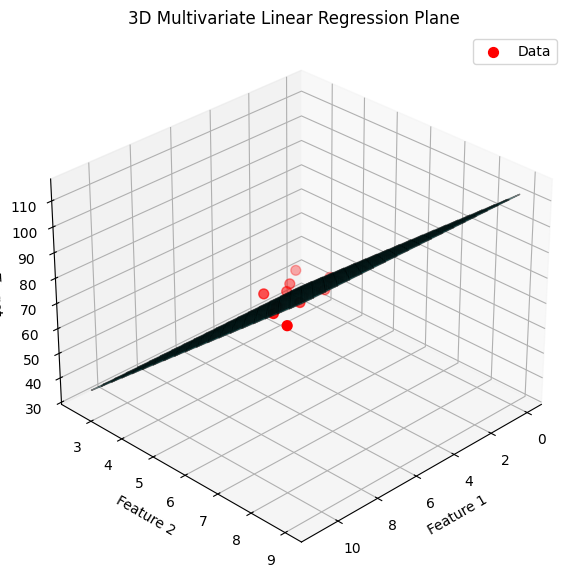

In [33]:
import matplotlib.pyplot as plt
import numpy as np  # only for plotting meshgrid

# Example: 2 features per sample
features = x  # list of [x1, x2]
labels_ = y   # target values
weight = w
bias = b

# Extract feature columns
x1_vals = [f[0] for f in features]
x2_vals = [f[1] for f in features]

# Create figure
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter original data
ax.scatter(x1_vals, x2_vals, labels_, color='red', label='Data', s=50)

# Create meshgrid using numpy
x1_grid = np.linspace(min(x1_vals)-1, max(x1_vals)+1, 20)
x2_grid = np.linspace(min(x2_vals)-1, max(x2_vals)+1, 20)
X_grid, Y_grid = np.meshgrid(x1_grid, x2_grid)

# Compute Z values (predictions) over the grid
Z_grid = weight[0]*X_grid + weight[1]*Y_grid + bias

# Plot regression plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='cyan', alpha=0.5, edgecolor='k')

# Labels and view
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Multivariate Linear Regression Plane')
ax.view_init(elev=30, azim=45)
ax.legend()
plt.show()
